Workshop - PE Band   Set index
  
สร้าง PE Band โดยกำหนดเป็น 15x 17x 19x 21x 23x

Solution : https://colab.research.google.com/drive/13pYZJjcNNW4sL465KHNi8gYRT8amgxpL?usp=sharing



In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('./set.xlsx', index_col= 'Date', parse_dates= True)

In [5]:
data

,Prior,Open,High,Low,Close,PE
Date,,,,,,
2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81
...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89


In [6]:
df = data[['Close', 'PE']]

In [12]:
# คำนวน EPS จาก ราคา/pe

df['EPS'] = df['Close']/df['PE']
df

<ipython-input-12-7f0441529065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EPS'] = df['Close']/df['PE']


,Close,PE,EPS
Date,,,
2016-01-04,1263.41,22.12,57.116184
2016-01-05,1253.34,21.99,56.995907
2016-01-06,1260.04,22.10,57.015385
2016-01-07,1224.83,21.46,57.075023
2016-01-08,1244.18,21.81,57.046309
...,...,...,...
2021-10-28,1624.31,20.81,78.054301
2021-10-29,1623.43,21.02,77.232636
2021-11-01,1613.78,20.89,77.251316


In [15]:
# สร้าง PE band (multiple)

df['PE15x'] = df['EPS'] * 15 #pe 15 ณ eps ตอนนั้น จะเป็นเท่าไหร่
df['PE17x'] = df['EPS'] * 17
df['PE19x'] = df['EPS'] * 19
df['PE21x'] = df['EPS'] * 21
df['PE23x'] = df['EPS'] * 23

df.columns

Index(['Close', 'PE', 'EPS', 'PE15x', 'PE17x', 'PE19x', 'PE21x', 'PE23x'], dtype='object')

In [17]:
pe_band = df[['Close', 'PE15x', 'PE17x', 'PE19x', 'PE21x', 'PE23x']]
pe_band

,Close,PE15x,PE17x,PE19x,PE21x,PE23x
Date,,,,,,
2016-01-04,1263.41,856.742767,970.975136,1085.207505,1199.439873,1313.672242
2016-01-05,1253.34,854.938608,968.930423,1082.922237,1196.914052,1310.905866
2016-01-06,1260.04,855.230769,969.261538,1083.292308,1197.323077,1311.353846
2016-01-07,1224.83,856.125349,970.275396,1084.425443,1198.575489,1312.725536
2016-01-08,1244.18,855.694635,969.787254,1083.879872,1197.972490,1312.065108
...,...,...,...,...,...,...
2021-10-28,1624.31,1170.814512,1326.923114,1483.031716,1639.140317,1795.248919
2021-10-29,1623.43,1158.489534,1312.954805,1467.420076,1621.885347,1776.350618
2021-11-01,1613.78,1158.769746,1313.272379,1467.775012,1622.277645,1776.780278


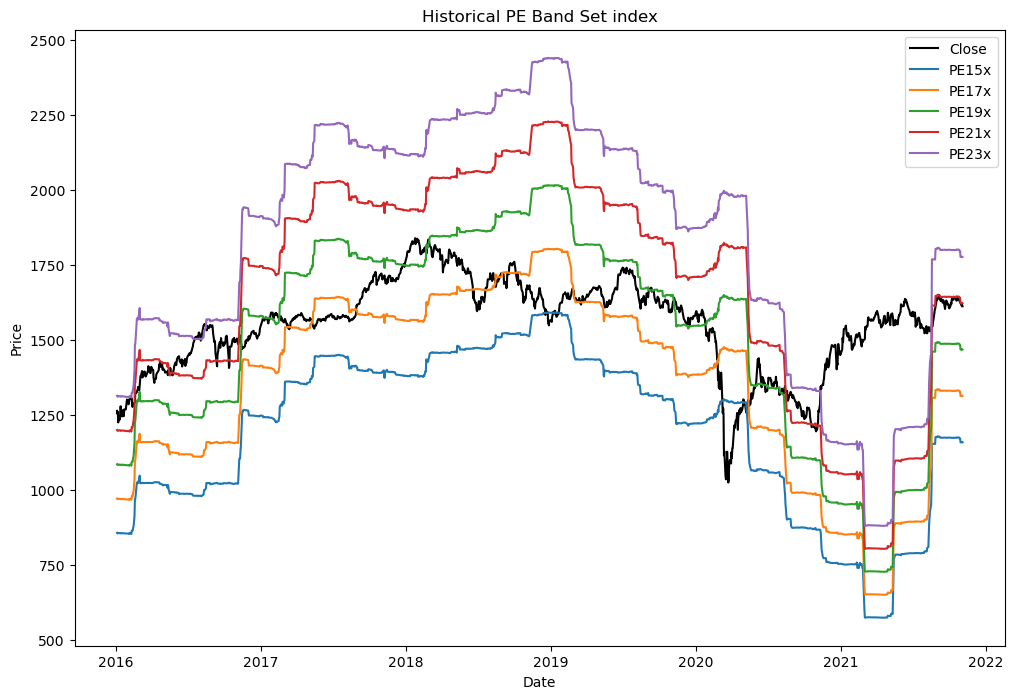

In [30]:
# plot graph

plt.figure(figsize= (12,8))
plt.plot(pe_band.index, pe_band['Close'], color='k')
plt.plot(pe_band.index, pe_band['PE15x'])
plt.plot(pe_band.index, pe_band['PE17x'])
plt.plot(pe_band.index, pe_band['PE19x'])
plt.plot(pe_band.index, pe_band['PE21x'])
plt.plot(pe_band.index, pe_band['PE23x'])

#plt.legend(('Close', 'PE', 'EPS', 'PE15x', 'PE17x', 'PE19x', 'PE21x', 'PE23x'))
plt.legend(pe_band.columns)
plt.title('Historical PE Band Set index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()